# Editing models with pygor3

A default model can be edited with IGoR from an already defined model. If you want to do it from scratch you need to IGoR C++ source code

In [1]:
import pygor3 as p3
species="human"
chain="tcr_beta"
mdl = p3.IgorModel.load_default(species, chain)

Reading Parms filename from:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Reading Marginals filename from:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt


## Changing Edges

Writing model parms in file  mdl_parms0.txt
Writing model marginals in file  mdl_marginals0.txt


<AxesSubplot:>

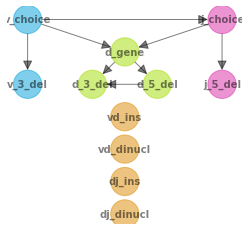

In [2]:
mdl.parms.write_model_parms("mdl_parms0.txt")
mdl.marginals.write_model_marginals("mdl_marginals0.txt", model_parms=mdl.parms)
mdl.parms.plot_Graph()

In [3]:
mdl['vd_ins']

<xarray.DataArray (vd_ins: 31)>
array([4.35094e-02, 4.52818e-02, 1.03509e-01, 1.20815e-01, 1.57023e-01,
       1.05497e-01, 8.40290e-02, 7.83653e-02, 5.68835e-02, 5.48993e-02,
       3.86246e-02, 3.54925e-02, 2.02105e-02, 1.92853e-02, 1.03827e-02,
       6.84924e-03, 4.88492e-03, 4.36633e-03, 2.46267e-03, 2.73884e-03,
       5.42621e-04, 1.46427e-03, 9.83047e-04, 9.36636e-04, 1.31972e-04,
       3.10250e-04, 2.60741e-04, 1.25265e-04, 1.92298e-09, 0.00000e+00,
       1.35988e-04])
Coordinates:
  * vd_ins       (vd_ins) int64 0 1 2 3 4 5 6 7 8 ... 22 23 24 25 26 27 28 29 30
    lbl__vd_ins  (vd_ins) int64 0 1 2 3 4 5 6 7 8 ... 22 23 24 25 26 27 28 29 30
Attributes:
    nickname:    vd_ins
    event_type:  Insertion
    seq_type:    VD_genes
    seq_side:    Undefined_side
    priority:    4
    parents:     []
    childs:      []

Writing model parms in file  mdl_parms1.txt
Writing model marginals in file  mdl_marginals1.txt


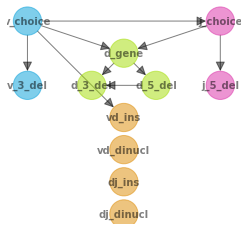

In [6]:
mdl.add_Edge('v_choice', 'vd_ins')
mdl.plot_Bayes_network()
mdl.write_model("mdl_parms1.txt", "mdl_marginals1.txt")

Writing model parms in file  mdl_parms3.txt
Writing model marginals in file  mdl_marginals3.txt


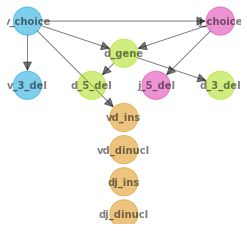

In [7]:
mdl.remove_Edge('d_5_del', 'd_3_del')
mdl.plot_Bayes_network()
mdl.write_model("mdl_parms3.txt", "mdl_marginals3.txt")

## Changing Event realizations

Reading Parms filename from:  /home/olivares/.local/share/igor/models/mouse/tcr_beta/models/model_parms.txt
Reading Marginals filename from:  /home/olivares/.local/share/igor/models/mouse/tcr_beta/models/model_marginals.txt


<AxesSubplot:>

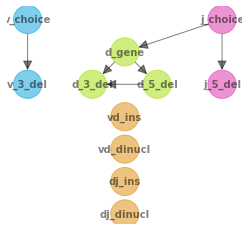

In [8]:
import pygor3 as p3
species="mouse"
chain="tcr_beta"
mdl = p3.IgorModel.load_default(species, chain)
mdl.parms.plot_Graph()

In [9]:
mdl['d_gene']

<xarray.DataArray (j_choice: 14, d_gene: 2)>
array([[9.97119e-01, 2.88075e-03],
       [9.91182e-01, 8.81843e-03],
       [9.99812e-01, 1.87606e-04],
       [9.99621e-01, 3.78589e-04],
       [9.97135e-01, 2.86515e-03],
       [9.93902e-01, 6.09815e-03],
       [0.00000e+00, 0.00000e+00],
       [5.02666e-01, 4.97334e-01],
       [6.20184e-01, 3.79816e-01],
       [5.45690e-01, 4.54310e-01],
       [5.22695e-01, 4.77305e-01],
       [5.28208e-01, 4.71792e-01],
       [0.00000e+00, 0.00000e+00],
       [5.10279e-01, 4.89721e-01]])
Coordinates:
  * j_choice       (j_choice) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13
    lbl__j_choice  (j_choice) object 'TRBJ1-1*01' 'TRBJ1-2*01' ... 'TRBJ2-7*01'
    seq__j_choice  (j_choice) object 'CAAACACAGAAGTCTTCTTTGGTAAAGGAACCAGACTCA...
  * d_gene         (d_gene) int64 0 1
    lbl__d_gene    (d_gene) object 'TRBD1*01' 'TRBD2*01'
    seq__d_gene    (d_gene) object 'GGGACAGGGGGC' 'GGGACTGGGGGGGC'
Attributes:
    nickname:    d_gene
    event_type:  GeneChoice
    seq_type:    D_gene
    seq_side:    Undefined_side
    priority:    6
    parents:     ['j_choice']
    childs:      ['d_3_del', 'd_5_del']

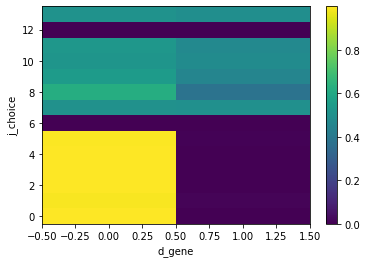

In [10]:
mdl['d_gene'].plot()

In [11]:
df = mdl.get_event_realizations_DataFrame('j_choice')
df

,value,name
id,,
0,CAAACACAGAAGTCTTCTTTGGTAAAGGAACCAGACTCACAGTTGTAG,TRBJ1-1*01
1,CAAACTCCGACTACACCTTCGGCTCAGGGACCAGGCTTTTGGTAATAG,TRBJ1-2*01
2,TTCTGGAAATACGCTCTATTTTGGAGAAGGAAGCCGGCTCATTGTT...,TRBJ1-3*01
3,TTTCCAACGAAAGATTATTTTTCGGTCATGGAACCAAGCTGTCTGT...,TRBJ1-4*01
4,TAACAACCAGGCTCCGCTTTTTGGAGAGGGGACTCGACTCTCTGTT...,TRBJ1-5*01
5,TTCCTATAATTCGCCCCTCTACTTTGCGGCAGGCACCCGGCTCACT...,TRBJ1-6*01
6,CCTGTGTTGGATGACCATGGTCTTGGAAAGGAACTTAGGTATAAGA,TRBJ1-7*01
7,TAACTATGCTGAGCAGTTCTTCGGACCAGGGACACGACTCACCGTC...,TRBJ2-1*01
8,CAAACACCGGGCAGCTCTACTTTGGTGAAGGCTCAAAGCTGACAGT...,TRBJ2-2*01


Now we can simple edit this dataframe 

In [12]:
new_df = df[:4]
new_df

,value,name
id,,
0,CAAACACAGAAGTCTTCTTTGGTAAAGGAACCAGACTCACAGTTGTAG,TRBJ1-1*01
1,CAAACTCCGACTACACCTTCGGCTCAGGGACCAGGCTTTTGGTAATAG,TRBJ1-2*01
2,TTCTGGAAATACGCTCTATTTTGGAGAAGGAAGCCGGCTCATTGTT...,TRBJ1-3*01
3,TTTCCAACGAAAGATTATTTTTCGGTCATGGAACCAAGCTGTCTGT...,TRBJ1-4*01


and set it as the new realizations for this particular event and for our model

In [13]:
mdl.set_realization_event_from_DataFrame('j_choice', new_df)

In [14]:
mdl.write_model("mdl_parms3.txt", "mdl_marginals3.txt")

Writing model parms in file  mdl_parms3.txt
Writing model marginals in file  mdl_marginals3.txt


In [18]:
mdl['j_choice'].loc[0]=0.4
mdl['j_choice'].loc[1]=0.1

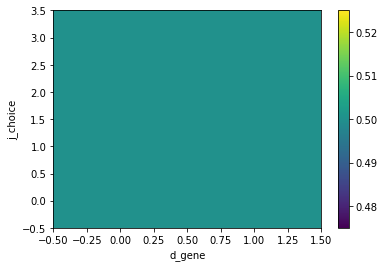

In [16]:
mdl['d_gene'].plot()

Reading Parms filename from:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Reading Marginals filename from:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt


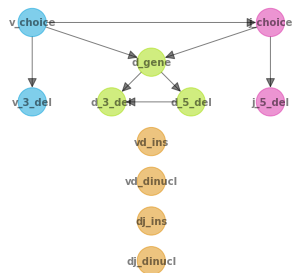

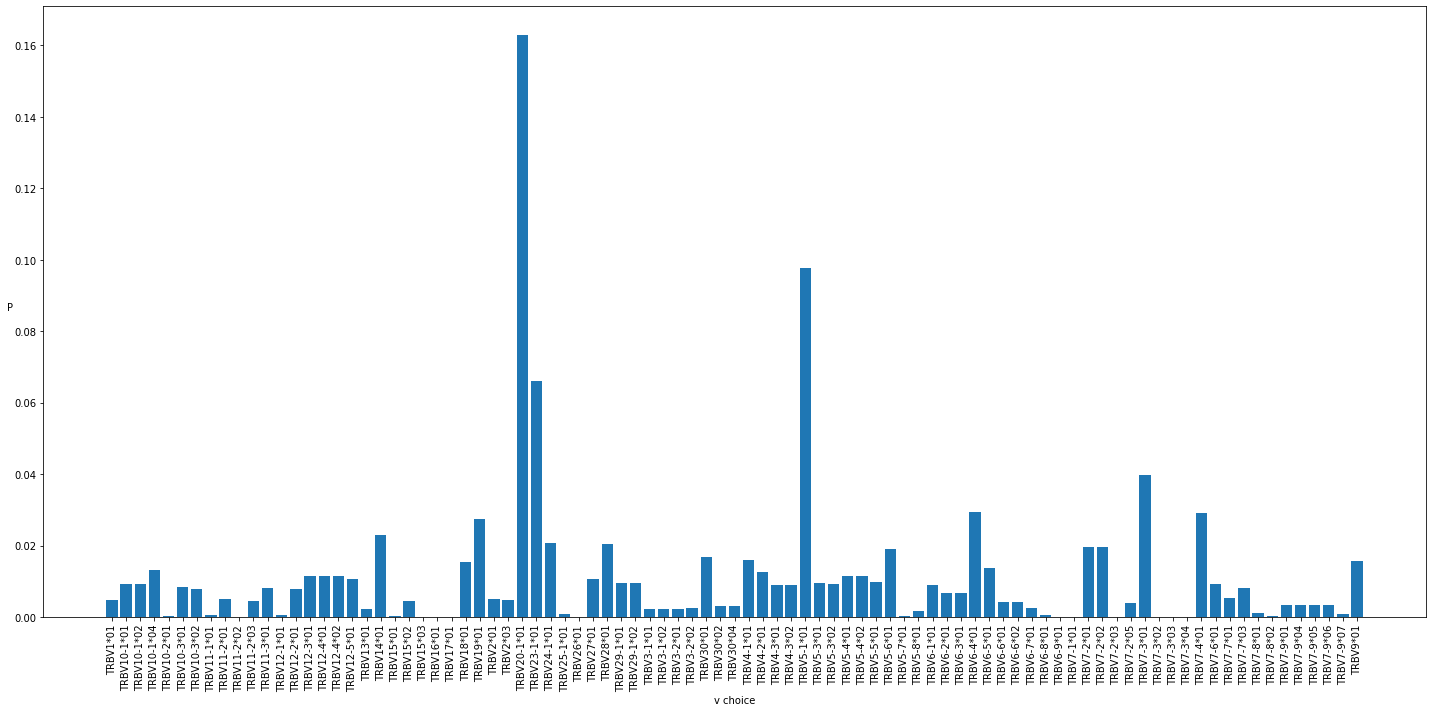

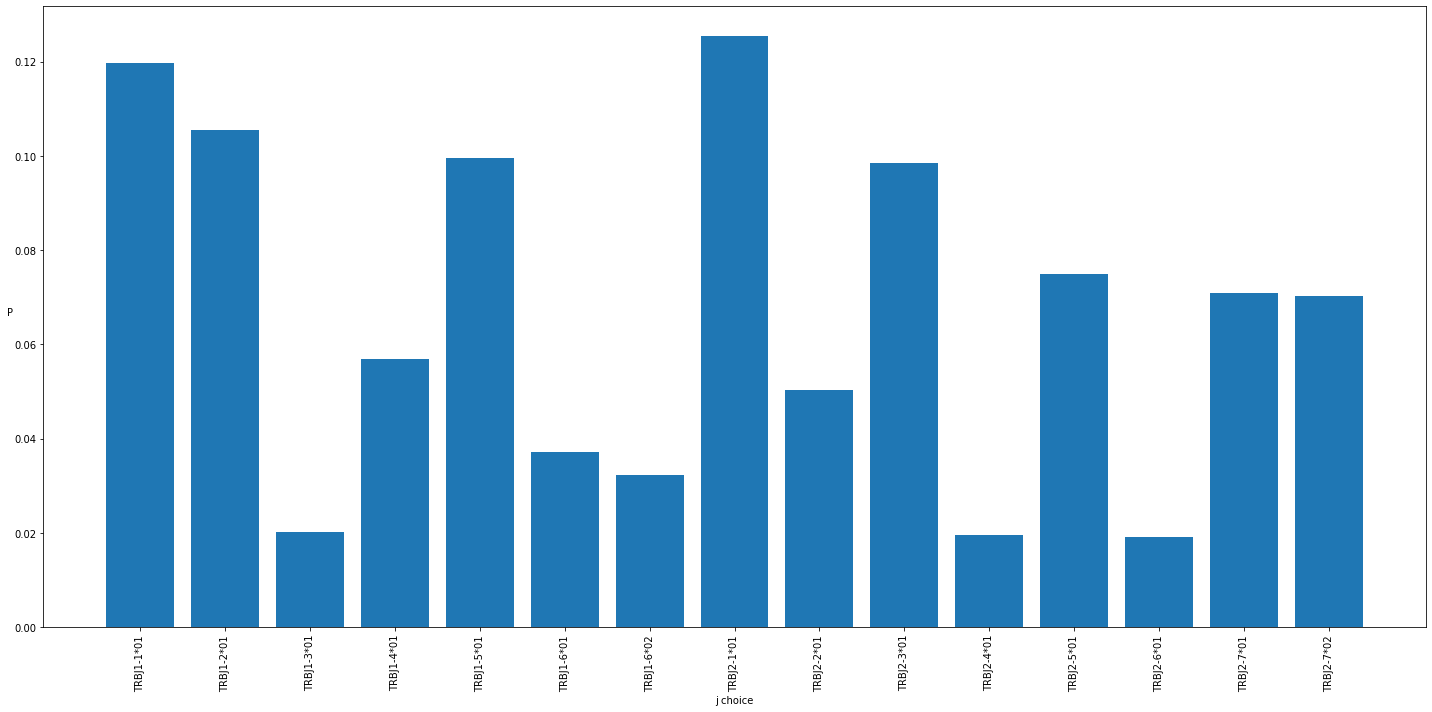

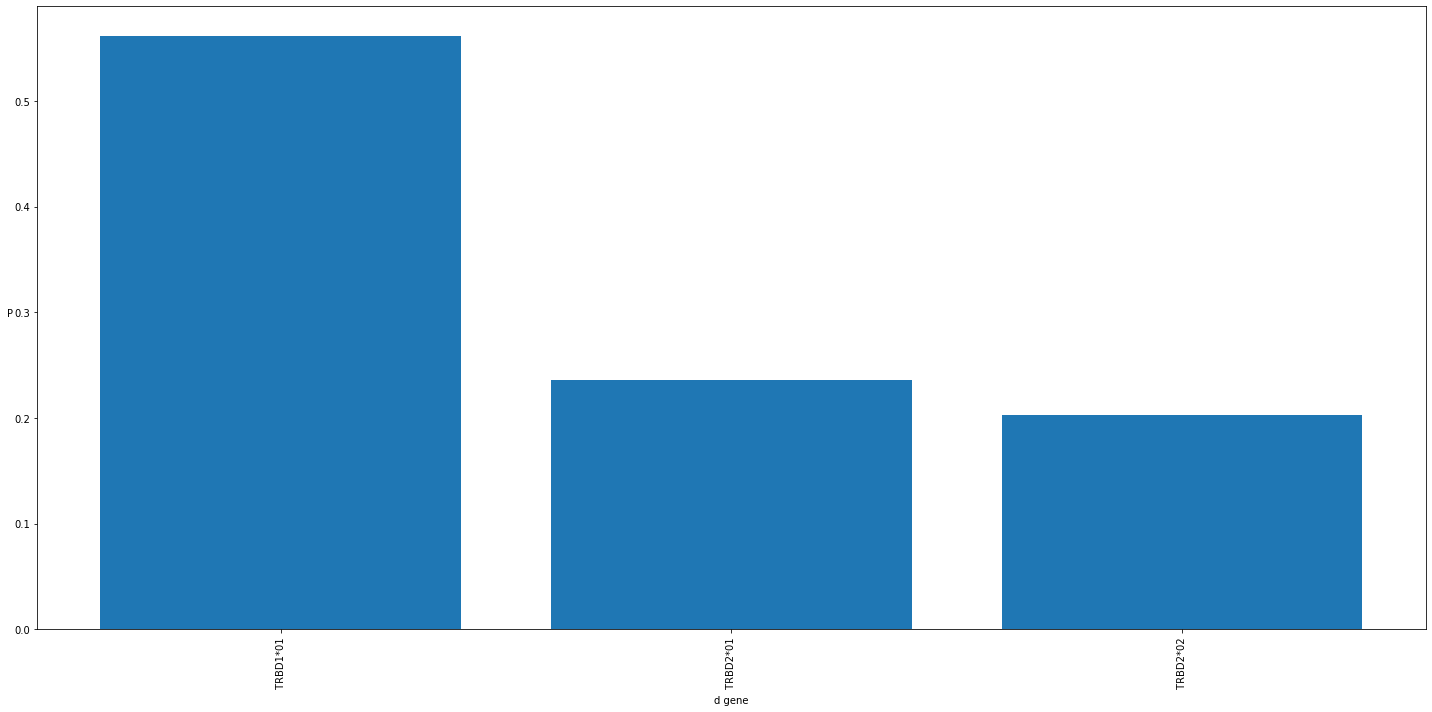

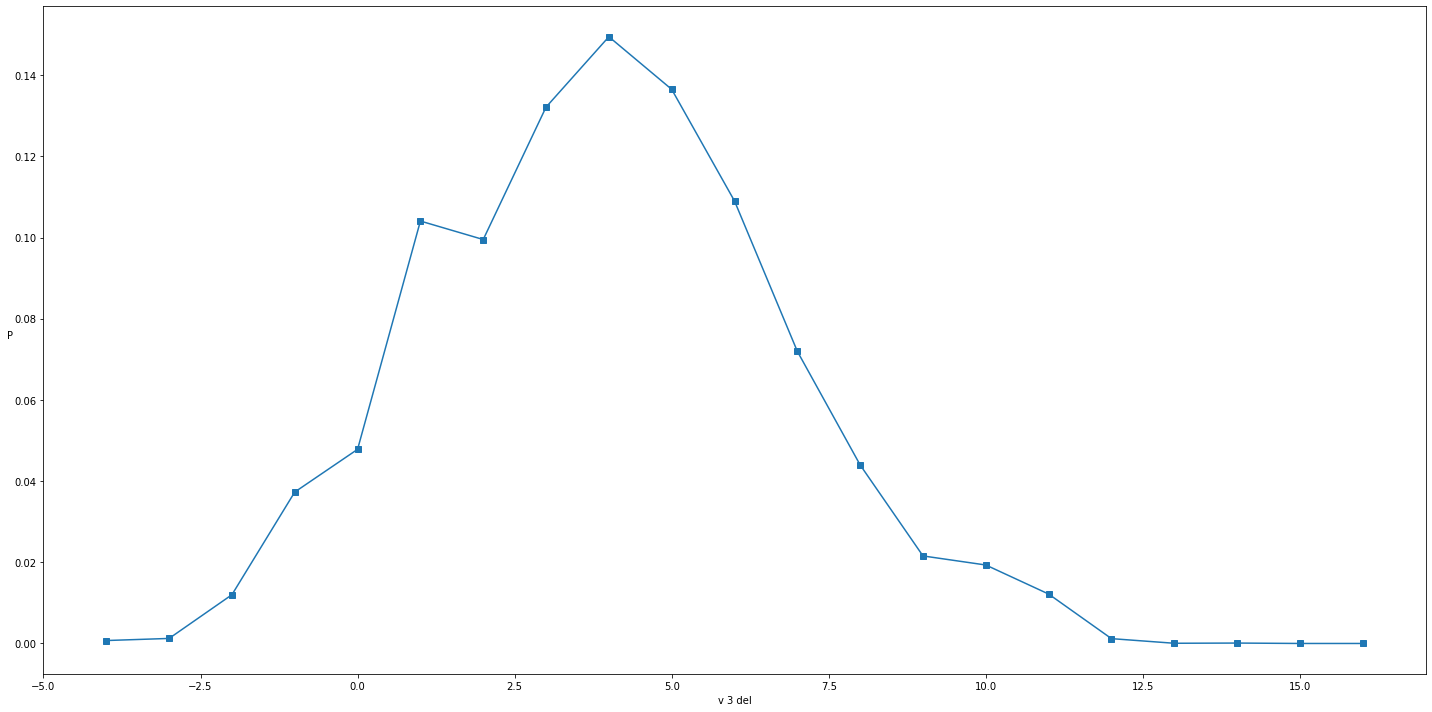

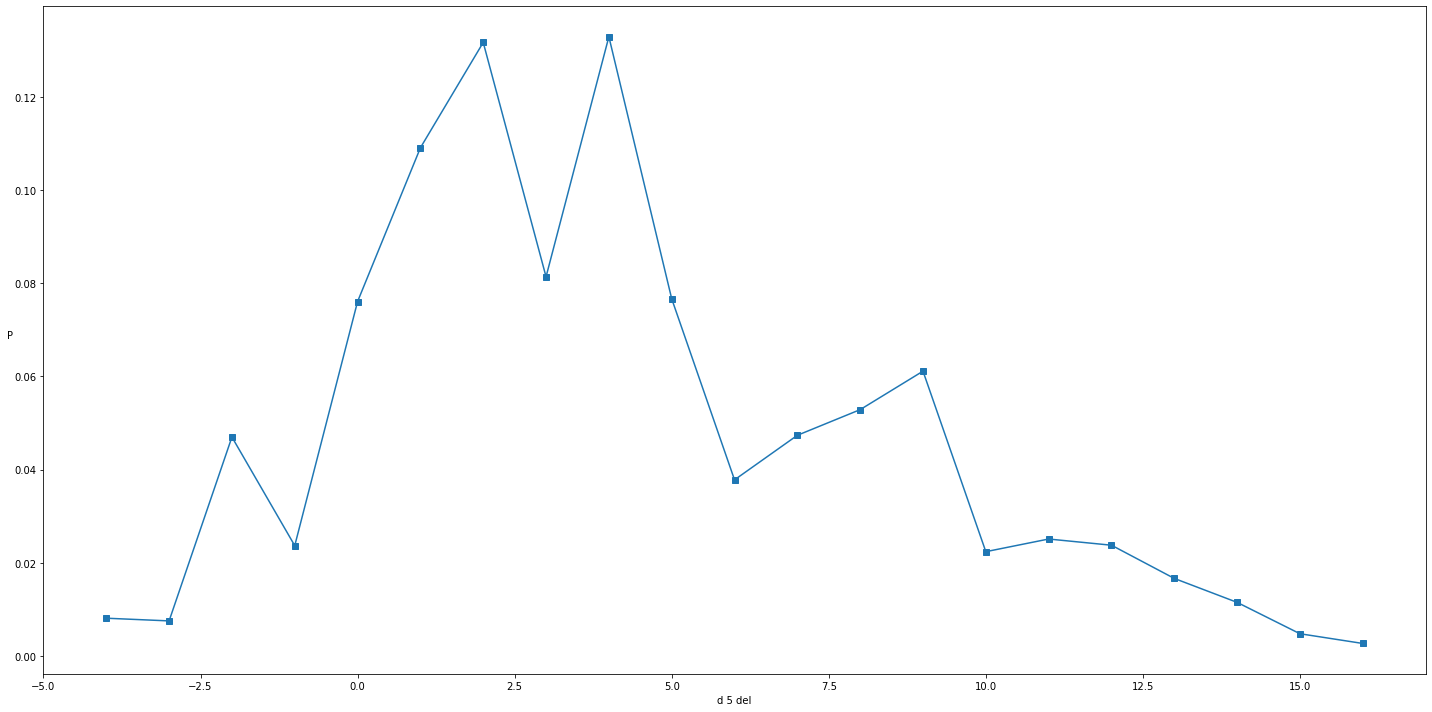

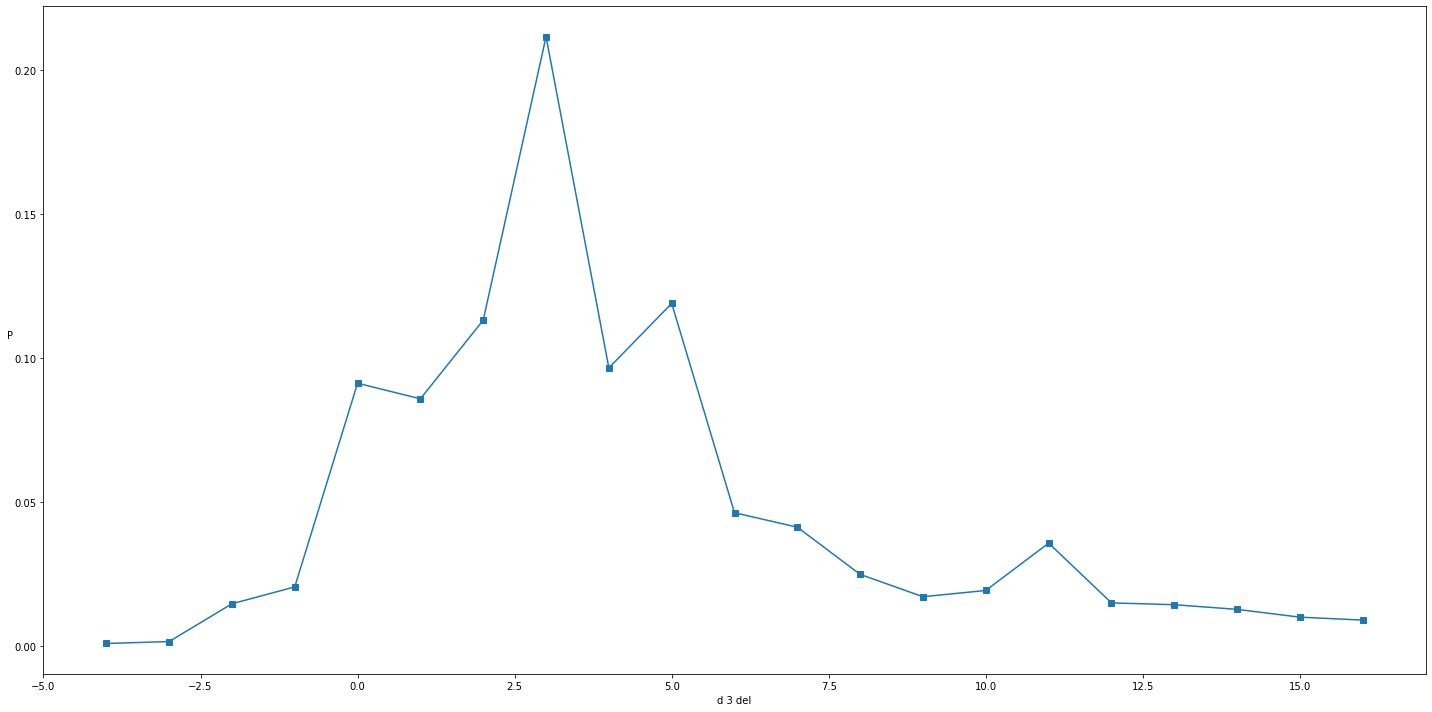

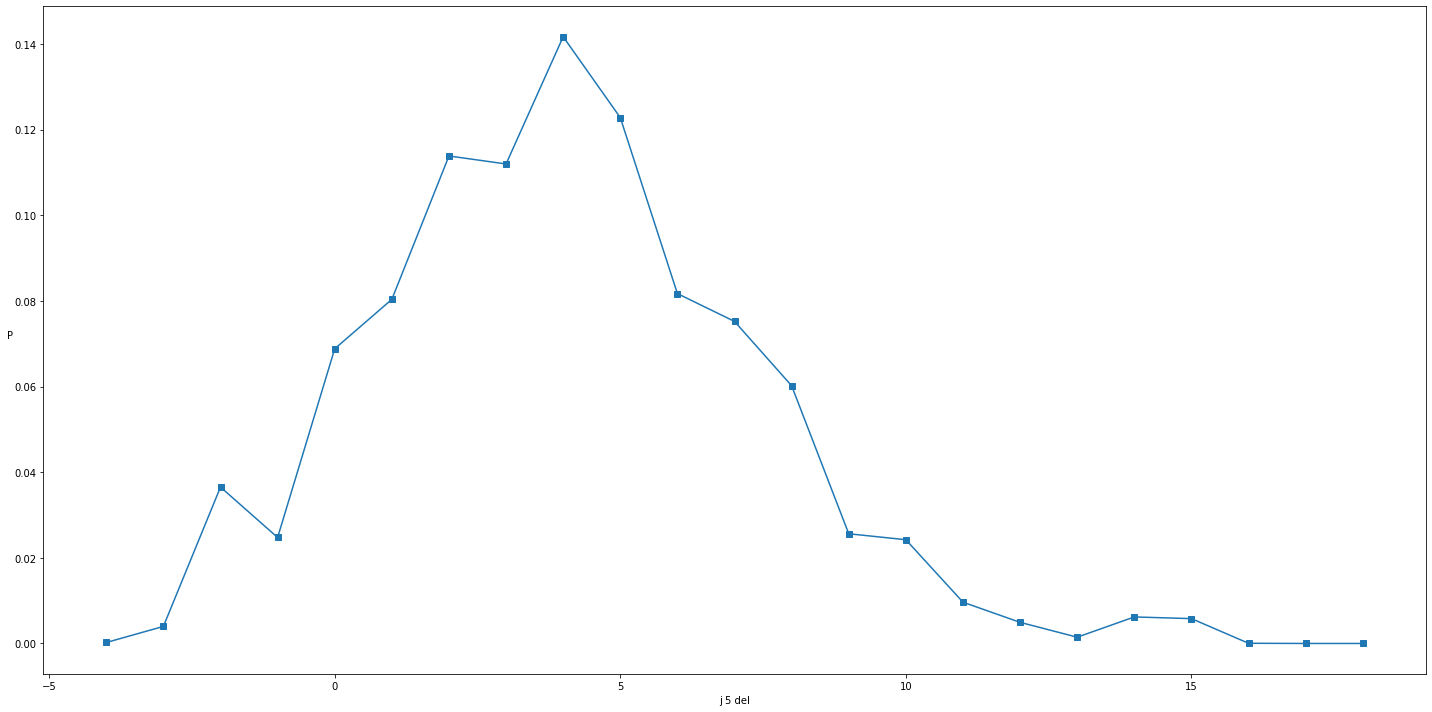

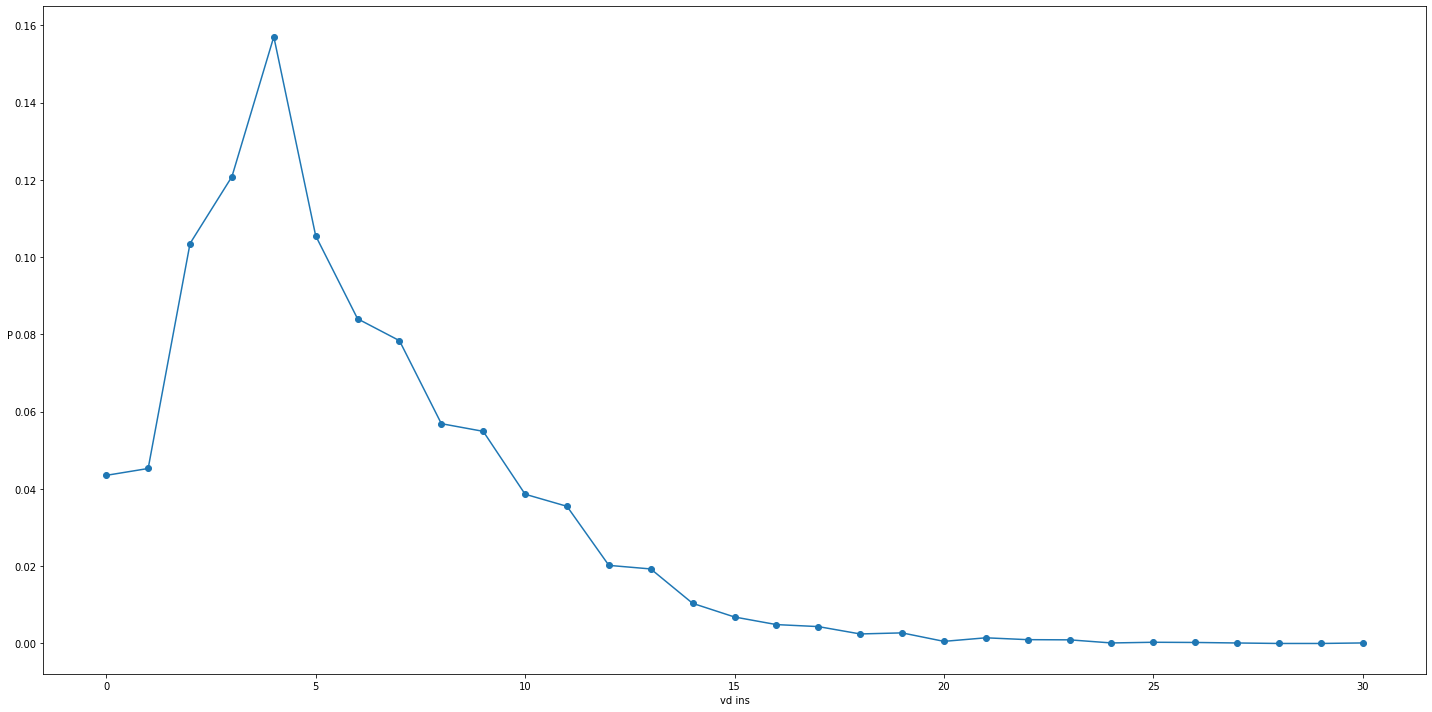

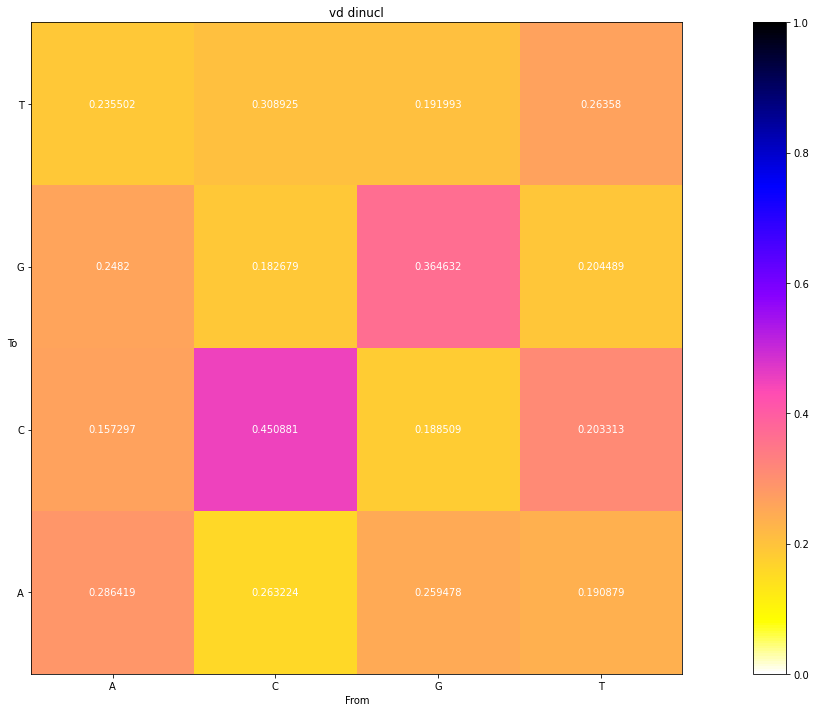

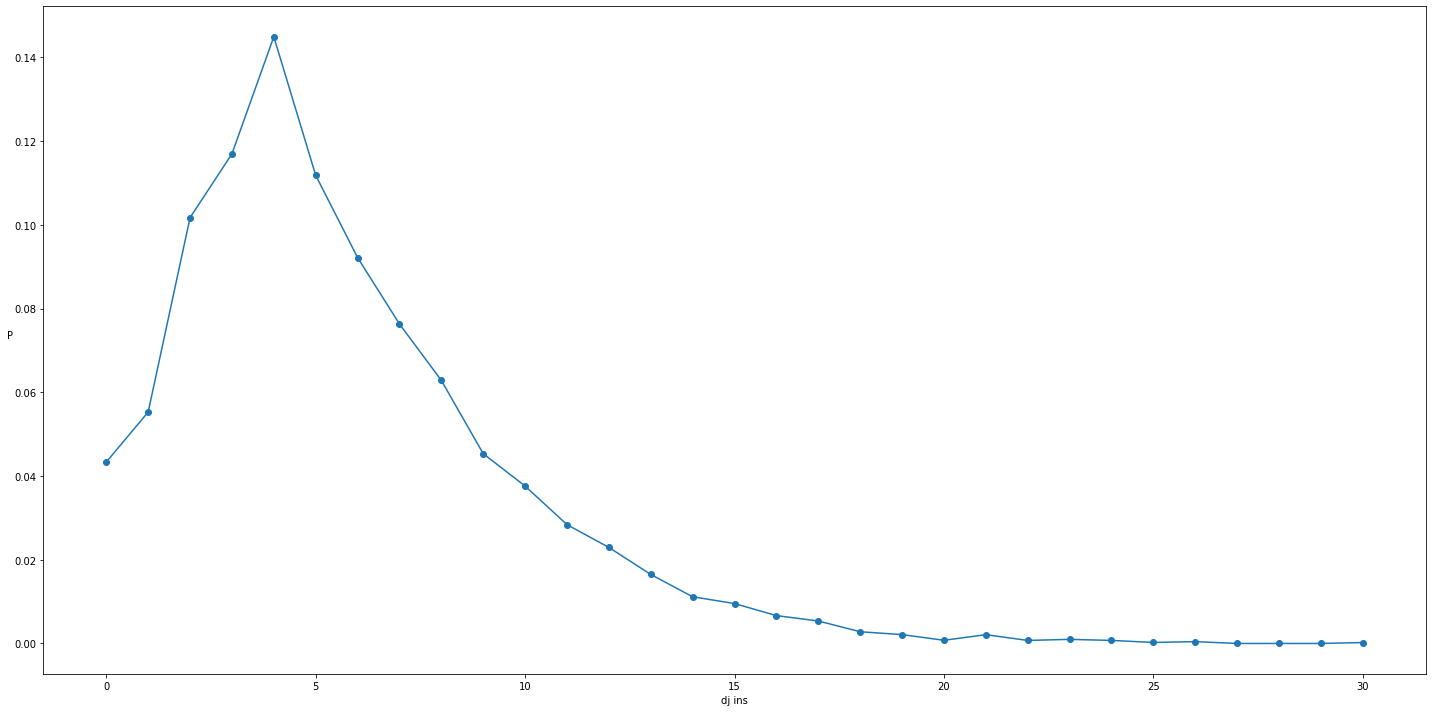

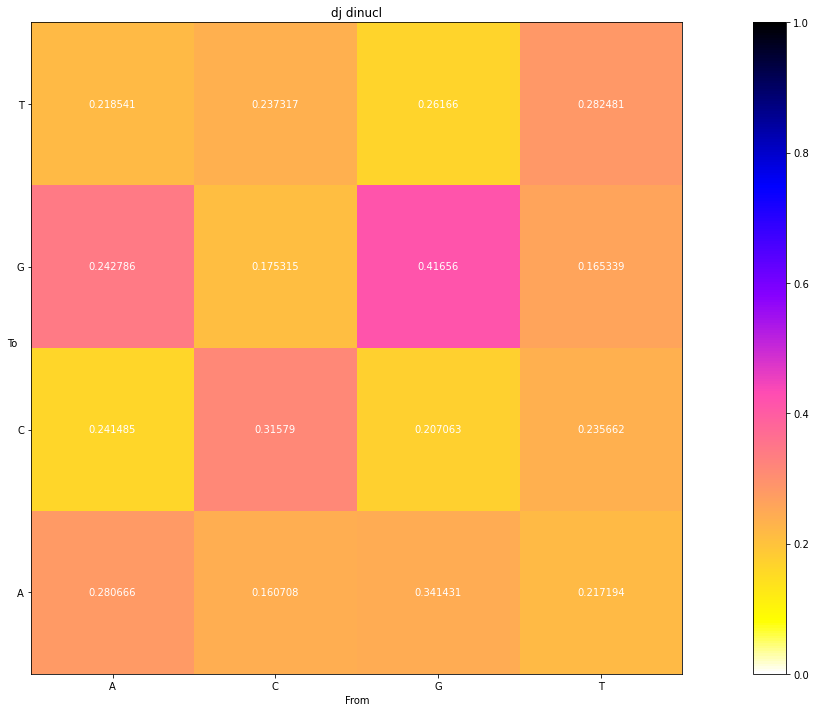

In [19]:
import pygor3 as p3
mdl_HTRB = p3.IgorModel.load_default("human", "tcr_beta")
mdl_HTRB.export_plot_Pmarginals("OOO")

## Making new model parms from IMGT website

### Downloading IMGT templates

In [4]:
import pygor3 as p3
p3.imgt.imgt_params

{'url.home': 'http://www.imgt.org',
 'url.genelist': 'http://www.imgt.org/download/GENE-DB/IMGTGENEDB-GeneList',
 'url.genedb': 'http://www.imgt.org/genedb/GENElect?',
 'url.release': 'http://www.imgt.org/download/GENE-DB/RELEASE',
 'url.readme': 'http://www.imgt.org/download/GENE-DB/README.txt',
 'Genesymbol': [],
 'data.chainlist': ['TRA', 'TRB', 'BCR']}

In [5]:
imgt_species_list = p3.imgt.get_species_list()
print( imgt_species_list )

['', 'Mus+pahari', 'Canis+lupus+familiaris', 'Tursiops+truncatus', 'Mus+musculus', 'Mus+cookii', 'Mus+minutoides', 'Capra+hircus', 'Macaca+fascicularis', 'Ovis+aries', 'Oncorhynchus+mykiss', 'Macaca+nemestrina', 'Sus+scrofa', 'Vicugna+pacos', 'Camelus+dromedarius', 'Ornithorhynchus+anatinus', 'Cercocebus+atys', 'Felis+catus', 'Mus+saxicola', 'Equus+caballus', 'Heterocephalus+glaber', 'Mus+spretus', 'Mustela+putorius+furo', 'Rattus+norvegicus', 'Gallus+gallus', 'Macaca+mulatta', 'Danio+rerio', 'Homo+sapiens', 'Salmo+salar', 'Bos+taurus', 'Gorilla+gorilla+gorilla', 'Rattus+rattus', 'Oryctolagus+cuniculus', 'Papio+anubis+anubis']


In [6]:
import pygor3 as p3
imgt_species = "Bos+taurus"
imgt_chain = "TRB"
bb_genomic_dict = p3.imgt.download_ref_genome_VDJ(imgt_species, imgt_chain)

Bos+taurus TRBV http://www.imgt.org/genedb/GENElect?query=7.2+TRBV&species=Bos+taurus
http://www.imgt.org/genedb/GENElect?query=7.2+TRBV&species=Bos+taurus
Bos+taurus TRBD http://www.imgt.org/genedb/GENElect?query=7.2+TRBD&species=Bos+taurus
http://www.imgt.org/genedb/GENElect?query=7.2+TRBD&species=Bos+taurus
Bos+taurus TRBJ http://www.imgt.org/genedb/GENElect?query=7.2+TRBJ&species=Bos+taurus
http://www.imgt.org/genedb/GENElect?query=7.2+TRBJ&species=Bos+taurus
http://www.imgt.org/genedb/GENElect?query=8.1+TRBV&species=Bos+taurus&IMGTlabel=2nd-CYS
http://www.imgt.org/genedb/GENElect?query=8.1+TRBJ&species=Bos+taurus&IMGTlabel=J-PHE
http://www.imgt.org/genedb/GENElect?query=8.1+TRBJ&species=Bos+taurus&IMGTlabel=J-TRP
http://www.imgt.org/genedb/GENElect?query=8.1+TRBV&species=Bos+taurus&IMGTlabel=2nd-CYS
http://www.imgt.org/genedb/GENElect?query=8.1+Bos+taurusJ&species=Bos+taurus&IMGTlabel=J-PHE
http://www.imgt.org/genedb/GENElect?query=8.1+Bos+taurusJ&species=Bos+taurus&IMGTlabel=J-TR

In [7]:
bb_genomic_dict['V']

,value,name,anchor_index,gfunction
id,,,,
0,ACGAGCTTGGTGGAGCAAAAGCCCAGGTGGGTCCTGGTACCTCGCA...,TRBV1*01,270.0,F
1,GAGGCCAGGATAGACAAGATACAAGATACGAGATCACAGTGACAGG...,TRBV10*01,NaN,NaN
2,AAGGTGCCGGTAGCCCAGTCCCCCAGACACAAGATCACAGAGAAAA...,TRBV11*01,273.0,P
3,AACCTAGGAGTCACCCAGACCCCTAGGCATGAGGTGACAGAAAAGG...,TRBV12-1*01,273.0,F
4,GATGCTGGAGTCACCCAGACCCCTAGGCATGAGGTGACAGAAAAGG...,TRBV12-2*01,273.0,F
...,...,...,...,...
119,GCTGGAGCAGTGTCCCAGTCCCCCAGGCACAGGGTCGCAGGGAGGG...,TRBV7-1*01,273.0,F
120,GCTGGAGTAGTGTCCCAGTCACCTGGGTACAGGGTCGCAGGCAGGG...,TRBV7-2*01,273.0,F
121,GCGGCAGTCACCCAGAAATCAAGAGACTGTATTATACAAACAGGAA...,TRBV8*01,279.0,P


In [8]:
bb_mdl_0 = p3.IgorModel.make_default_from_Dataframe_dict(bb_genomic_dict)
bb_mdl_0

<AxesSubplot:>

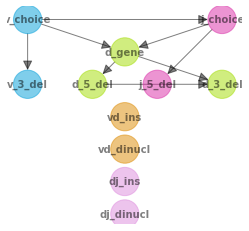

In [10]:
bb_mdl_0.plot_Bayes_network()

<AxesSubplot:>

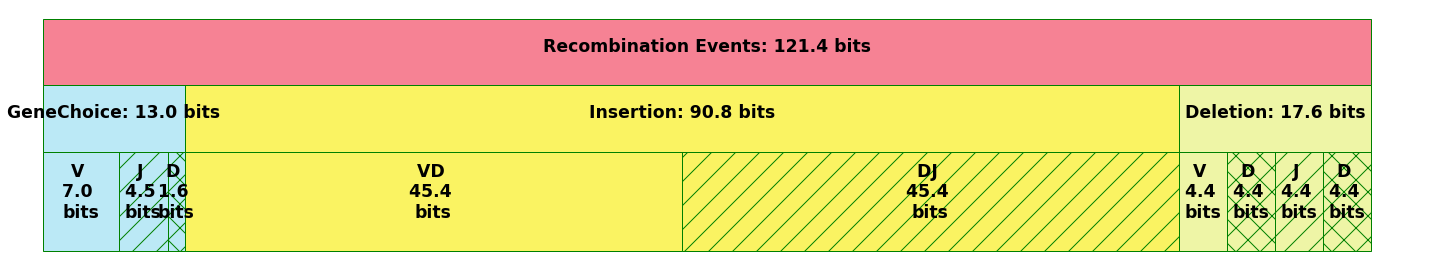

In [17]:
bb_mdl_0.plot_recombination_entropy()

In [19]:
df_entropy_decomposition = bb_mdl_0.get_df_entropy_decomposition()
df_entropy_decomposition

,event_nickname,event_type,seq_type,entropy
0,v_choice,GeneChoice,V_gene,6.954196
1,j_choice,GeneChoice,J_gene,4.459432
2,d_gene,GeneChoice,D_gene,1.584963
3,vd_ins,Insertion,VD_genes,45.406332
4,dj_ins,Insertion,DJ_gene,45.406332
5,v_3_del,Deletion,V_gene,4.392317
6,d_5_del,Deletion,D_gene,4.392317
7,j_5_del,Deletion,J_gene,4.392317
8,d_3_del,Deletion,D_gene,4.392317


In [15]:
len(bb_mdl_0.parms['v_choice'])

124

In [22]:
import numpy as np
10**(df_entropy_decomposition['entropy'].sum()*np.log10(2))

3.460819477103766e+36

In [33]:
ha_mdl = p3.get_default_IgorModel('human', 'beta')
H_ha_mdl = ha_mdl.get_df_entropy_decomposition()['entropy'].sum()
H_ha_mdl, H_ha_mdl*np.log10(2)

Reading Parms filename from:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Reading Marginals filename from:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt


(52.796925373085635, 15.893458216131508)

In [34]:
ha_mdl.genomic_dataframe_dict
ha_mdl_0 = p3.IgorModel.make_default_from_Dataframe_dict(ha_mdl.genomic_dataframe_dict)
H_ha_mdl_0 = ha_mdl_0.get_df_entropy_decomposition()['entropy'].sum()
H_ha_mdl_0, H_ha_mdl_0*np.log10(2)

(120.34952120325693, 36.228815845978644)